<a href="https://colab.research.google.com/github/delademf/malaria_classification_CNN/blob/main/Malaria_detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential  # Fix: Added 'models'
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, ZeroPadding2D, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!git clone https://github.com/laxmimerit/Malaria-Classification-Using-CNN.git

Cloning into 'Malaria-Classification-Using-CNN'...
remote: Enumerating objects: 27577, done.
remote: Total 27577 (delta 0), reused 0 (delta 0), pack-reused 27577
Receiving objects: 100% (27577/27577), 331.67 MiB | 34.46 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Updating files: 100% (27562/27562), done.


In [5]:
img_width =64
img_height =64

In [7]:
datagen = ImageDataGenerator(rescale=1/255.0,validation_split=0.2)

In [8]:
train_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN',
                                                   target_size=(img_width,img_height),
                                                   class_mode='binary',
                                                   batch_size =16,
                                                   subset = 'training'
                                                   )

Found 22047 images belonging to 2 classes.


In [15]:
validation_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN',
                                                   target_size=(img_width,img_height),
                                                   class_mode='binary',
                                                   batch_size =16,
                                                   subset = 'validation'
                                                   )

Found 5511 images belonging to 2 classes.


**CNN Model**

In [9]:
model = Sequential()

model.add(Conv2D(16,(3,3), input_shape = (img_width,img_height,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

**Compiled model**

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

**Model Training**

In [16]:
history = model.fit_generator(generator=train_data_generator,
                              steps_per_epoch= len(train_data_generator),
                              epochs =5,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator)
                              )

Epoch 1/5


<ipython-input-16-8df9404fb93b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_data_generator,


1378/1378 [==============================] - 129s 93ms/step - loss: 3.1998e-04 - accuracy: 1.0000 - val_loss: 4.8551e-15 - val_accuracy: 1.0000
Epoch 2/5
1378/1378 [==============================] - 122s 89ms/step - loss: 2.2879e-11 - accuracy: 1.0000 - val_loss: 4.7568e-15 - val_accuracy: 1.0000
Epoch 3/5
1378/1378 [==============================] - 113s 82ms/step - loss: 2.7678e-12 - accuracy: 1.0000 - val_loss: 4.7568e-15 - val_accuracy: 1.0000
Epoch 4/5
1378/1378 [==============================] - 122s 89ms/step - loss: 6.5550e-11 - accuracy: 1.0000 - val_loss: 4.4071e-15 - val_accuracy: 1.0000
Epoch 5/5
1378/1378 [==============================] - 119s 86ms/step - loss: 4.3455e-12 - accuracy: 1.0000 - val_loss: 4.3949e-15 - val_accuracy: 1.0000


In [17]:
history.history

{'loss': [0.00031998244230635464,
  2.287864168948328e-11,
  2.7678267663922007e-12,
  6.555041925926375e-11,
  4.3455087618549104e-12],
 'accuracy': [0.9999546408653259, 1.0, 1.0, 1.0, 1.0],
 'val_loss': [4.855050552126511e-15,
  4.756770589806015e-15,
  4.756769742773068e-15,
  4.4071001425863895e-15,
  4.3949392905626595e-15],
 'val_accuracy': [1.0, 1.0, 1.0, 1.0, 1.0]}

In [18]:
def plot_learningCurve(history,epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train','val'],loc ='upper left')
  plt.show()

# Plot training & validation loss values
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train','val'],loc ='upper left')
  plt.show()

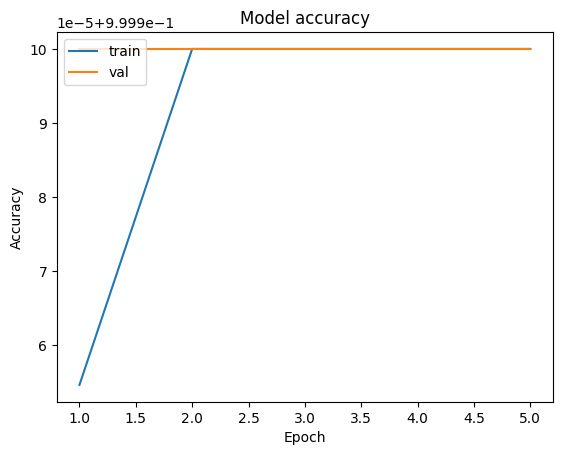

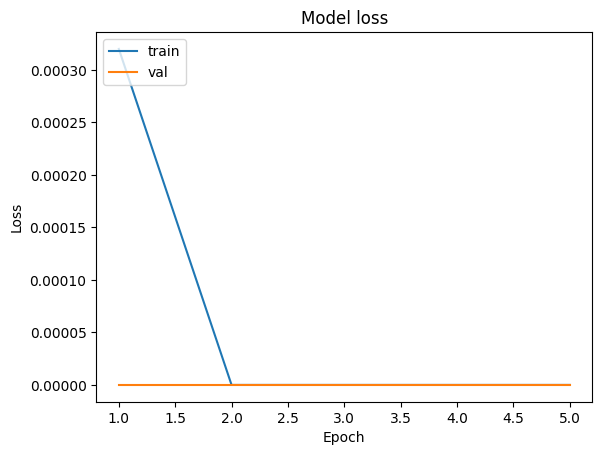

In [19]:
plot_learningCurve(history,5)